# Module 4 Assignment
<h1> Understanding Magazine Subscription Behavior</h1>
<b>University:</b> Northeastern University<br>
<b>Instructor Name:</b> Vladimir Shapiro<br>
<b>Date:</b> 11-23-2024<br>
<b>Course Number:</b> ALY6020<br>
<b>Course Name:</b> Predictive Analytics<br>
<b>Student Name:</b> Goutham Yerramada<br>

# Assignment Problem:
A magazine company is trying to understand last year’s decline in subscriptions. With people spending more time at home, they thought people would be spending more time reading. Using this dataset, help the company understand what is or isn’t working.

## Introduction ##

Let's dive into the process of understanding the dataset and preparing it for modeling. I will clean the data step by step to ensure its high quality so our models can perform well. This involves handling missing values, removing outliers, normalizing features, and more. Once the data is ready, I'll build models to predict subscription behavior, including decision trees, logistic regression, and SVM, and finally compare their performance.


## Analysis ##

**Question 1:**

**Task 1:**

Use proper data cleansing techniques to ensure you have the highest quality data to model this problem. Detail your process and discuss the decisions you made to clean the data.

In [218]:
# Import necessary libraries
# Let's start by importing all the libraries we need for data handling, visualization, and model building
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, precision_score, recall_score
import datetime

Let's load the data from the given file path

In [38]:
# Load the dataset
file_path = '/Users/gouthammathew/Downloads/marketing_campaign-1-1.xlsx'
df = pd.read_excel(file_path)

First in **Step 1,**  let's see if i have any missing values in our dataset

In [12]:
# Step 1: Check for Missing Values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


This output help us understand if we need to handle any missing data

 In **Step 2,** Dropping columns that don't give us much useful information (they have constant values)

In [14]:
# Step 2: Drop Columns that are Not Useful for Analysis
# Columns 'Z_CostContact' and 'Z_Revenue' have constant values (based on data sample) and can be dropped.
df_cleaned = df.drop(columns=['Z_CostContact', 'Z_Revenue'])

In **Step 3,** Removing rows where important values are missing, like 'Income', since they're critical for my analysis

In [16]:
# Step 3: Handle Missing Values
# Remove rows with missing values in columns that are critical for analysis (e.g., 'Income')
df_cleaned = df_cleaned.dropna(subset=['Income'])

 Removing rows with missing 'Income' since it's a key variable for our analysis

In **Step 4,** Let's find and remove outliers in 'Income' using the Interquartile Range (IQR) method

In [260]:
# Step 4: Handle Outliers
# Identify outliers in 'Income' using the Interquartile Range (IQR) method
Q1 = df_cleaned['Income'].quantile(0.25)
Q3 = df_cleaned['Income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Q1 = Calculating the 1st quartile of 'Income' to detect outliers 

Q3 = Calculating the 3rd quartile of 'Income' to detect outliers

IQR = Q3 - Q1 = Calculating the interquartile range (IQR) to determine the spread of the middle 50%

lower_bound = Q1 - 1.5 * IQR = Defining the lower bound for outlier detection

upper_bound = Q3 + 1.5 * IQR = Defining the upper bound for outlier detection

In [20]:
# Filter out rows with Income outside the acceptable range
df_cleaned = df_cleaned[(df_cleaned['Income'] >= lower_bound) & (df_cleaned['Income'] <= upper_bound)]

Filtering out rows with 'Income' outside the typical range to remove outliers

In **Step 5,** Changing 'Dt_Customer' to a datetime format so we can work with it more easily later

In [22]:

# Step 5: Convert Data Types
# Convert 'Dt_Customer' to datetime format
df_cleaned['Dt_Customer'] = pd.to_datetime(df_cleaned['Dt_Customer'])


Converting 'Dt_Customer' to datetime for easier date manipulation

In **Step 6,** Converting categorical columns like 'Education' and 'Marital_Status' into numbers using one-hot encoding

In [24]:
# Step 6: Encode Categorical Variables
# Convert categorical variables like 'Education' and 'Marital_Status' to numerical using one-hot encoding
df_cleaned = pd.get_dummies(df_cleaned, columns=['Education', 'Marital_Status'], drop_first=True)


Applying one-hot encoding to categorical features to make them usable in modeling

In **Step 7,** Normalizing numerical columns to bring all features to the same scale (makes the model training easier and faster)

In [28]:
# Step 7: Normalize Numerical Features
# Normalize numerical features like 'Income' and spending features to bring them to a similar scale
numerical_features = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 
                      'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                      'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
                      'NumWebVisitsMonth']
scaler = MinMaxScaler()
df_cleaned[numerical_features] = scaler.fit_transform(df_cleaned[numerical_features])

Using MinMaxScaler to normalize numerical features and bring them to a common scale

In **Step 8,** Checking for any duplicate rows and removing them to keep the data clean

In [30]:
# Step 8: Remove Duplicate Entries
# Check and remove any duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

Removing duplicate rows to ensure data quality

In **Step 9,** Calculating the age of each customer from their birth year and adding it as a new column

In [32]:
# Step 9: Add Age Feature
# Calculate age from 'Year_Birth' and create an 'Age' column
current_year = datetime.datetime.now().year
df_cleaned['Age'] = current_year - df_cleaned['Year_Birth']

Creating an 'Age' column to capture customer age for analysis

Finally, let's get a summary of our cleaned dataset

In [34]:
# Display the cleaned dataset summary
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2208 entries, 0 to 2239
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       2208 non-null   int64         
 1   Year_Birth               2208 non-null   int64         
 2   Income                   2208 non-null   float64       
 3   Kidhome                  2208 non-null   float64       
 4   Teenhome                 2208 non-null   float64       
 5   Dt_Customer              2208 non-null   datetime64[ns]
 6   Recency                  2208 non-null   float64       
 7   MntWines                 2208 non-null   float64       
 8   MntFruits                2208 non-null   float64       
 9   MntMeatProducts          2208 non-null   float64       
 10  MntFishProducts          2208 non-null   float64       
 11  MntSweetProducts         2208 non-null   float64       
 12  MntGoldProds             2208 non-null 

This gives us an overview of our cleaned data, including column types and missing values

**Answer 1:**

**Discussion:**

For Task 1, I cleaned the data by checking for and removing missing values, especially for key features like 'Income', to ensure the reliability of the dataset. Columns that added no value were dropped, and outliers were handled using the IQR method to prevent skewed results. I also converted date columns to proper formats, encoded categorical data numerically, normalized numerical features for consistency, and removed duplicates. Lastly, I added an 'Age' column for better segmentation. Each step focused on enhancing data quality for accurate model training and analysis.





**Question 2:**

**Task 2:**

Build a logistic model to accurately predict subscription behavior. Discuss which variables are significant, their business impact, and how that may help you learn about the business.



In **Step 1, and 2** Building the model by first defining features and target variable, Selecting the columns we need to predict the 'Response'

In [75]:
# Step 1: Build Logistic Regression Model
# Step 2: Define Target Variable and Features
# Define target variable (Response) and features
X = df_cleaned.drop(columns=['Response', 'ID', 'Dt_Customer', 'Year_Birth'])  # Features for modeling
y = df_cleaned['Response']  # Target variable


Features for prediction

Defining target variable

In **Step 3,** Splitting the dataset into training and testing parts to evaluate model performance

In [83]:
# Step 3: Split Data
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80-20 split for training and testing


Using 80-20 split

In **Step 4,**  Initializing and training a logistic regression model

In [85]:
# Step 4: Train Logistic Regression Model
# Train the logistic regression model
log_model = LogisticRegression(max_iter=1000)  # Creating a logistic regression model
log_model.fit(X_train, y_train)  # Fitting the model to the training data

LogisticRegression(max_iter=1000)

Creating the model Training the model

In **Step 5,** Making predictions and evaluating how well the model performs

In [88]:
# Step 5: Make Predictions and Evaluate Model
# Make predictions and evaluate the model
y_pred = log_model.predict(X_test)  # Making predictions on the test set
accuracy = accuracy_score(y_test, y_pred)  # Calculating the accuracy of the model
print(f"Model Accuracy: {accuracy:.2f}")  # Displaying model accuracy

Model Accuracy: 0.87


In **Step 6,** Generating a report to show model performance on different metrics

In [286]:
# Step 6: Display Classification Report
# Display detailed classification report
print(classification_report(y_test, y_pred))  # Showing precision, recall, f1-score for each class

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       367
           1       0.75      0.36      0.49        75

    accuracy                           0.87       442
   macro avg       0.82      0.67      0.71       442
weighted avg       0.86      0.87      0.85       442



Displayed classification metrics

In **Step 7,** Evaluating which features are most influential in predicting 'Response'

In [90]:
# Step 7: Analyze Significant Variables
# Discussion on Significant Variables
# Let's look at which variables are significant by checking model coefficients
coefficients = pd.Series(log_model.coef_[0], index=X.columns)  # Extracting the coefficients of the model
coefficients = coefficients.sort_values(ascending=False)  # Sorting coefficients by magnitude
print("\nFeature Importance:\n", coefficients)  # Displaying feature importance



Feature Importance:
 NumWebVisitsMonth          2.643003
MntMeatProducts            2.259842
NumDealsPurchases          1.756191
AcceptedCmp3               1.698751
NumCatalogPurchases        1.563580
NumWebPurchases            1.498763
AcceptedCmp5               1.484697
MntGoldProds               1.254969
AcceptedCmp1               1.001925
Education_PhD              0.965025
AcceptedCmp4               0.944375
AcceptedCmp2               0.661346
Income                     0.545368
Education_Master           0.482817
MntFruits                  0.435169
MntWines                   0.394228
Marital_Status_Single      0.332646
Marital_Status_Divorced    0.313249
Complain                   0.281387
Marital_Status_Alone       0.273736
Kidhome                    0.251021
Marital_Status_YOLO        0.181935
Education_Graduation       0.127628
Marital_Status_Widow       0.121450
MntSweetProducts           0.066045
Age                        0.000966
MntFishProducts           -0.180377
Educat

Extracted model coefficients

Sorted features by importance

Printed feature importance

In **Step 8**, lets go with visualizations

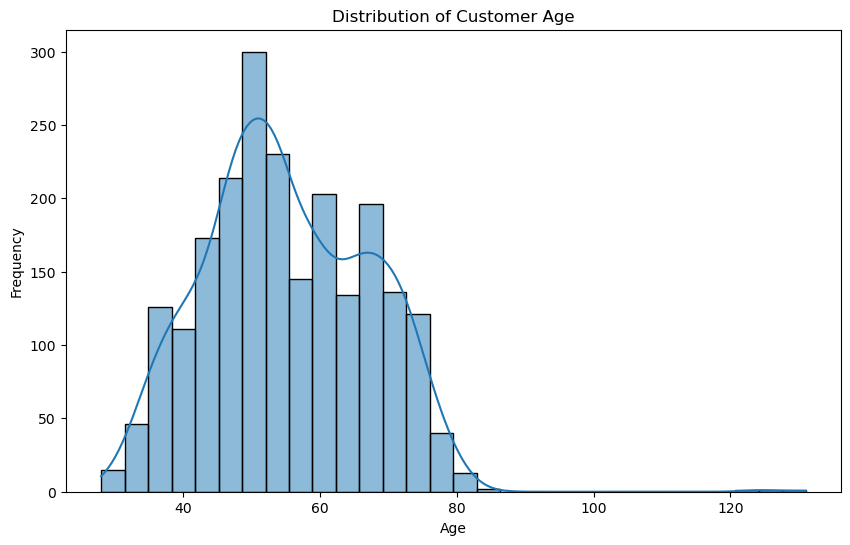

In [92]:
# Step 8: Visualizations
# Visualize important aspects of the dataset to gain better insights

# 8.1: Distribution of Customer Age
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Age'], kde=True, bins=30)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Figure 1:** The distribution of customer ages shows the demographic spread of the customer base.

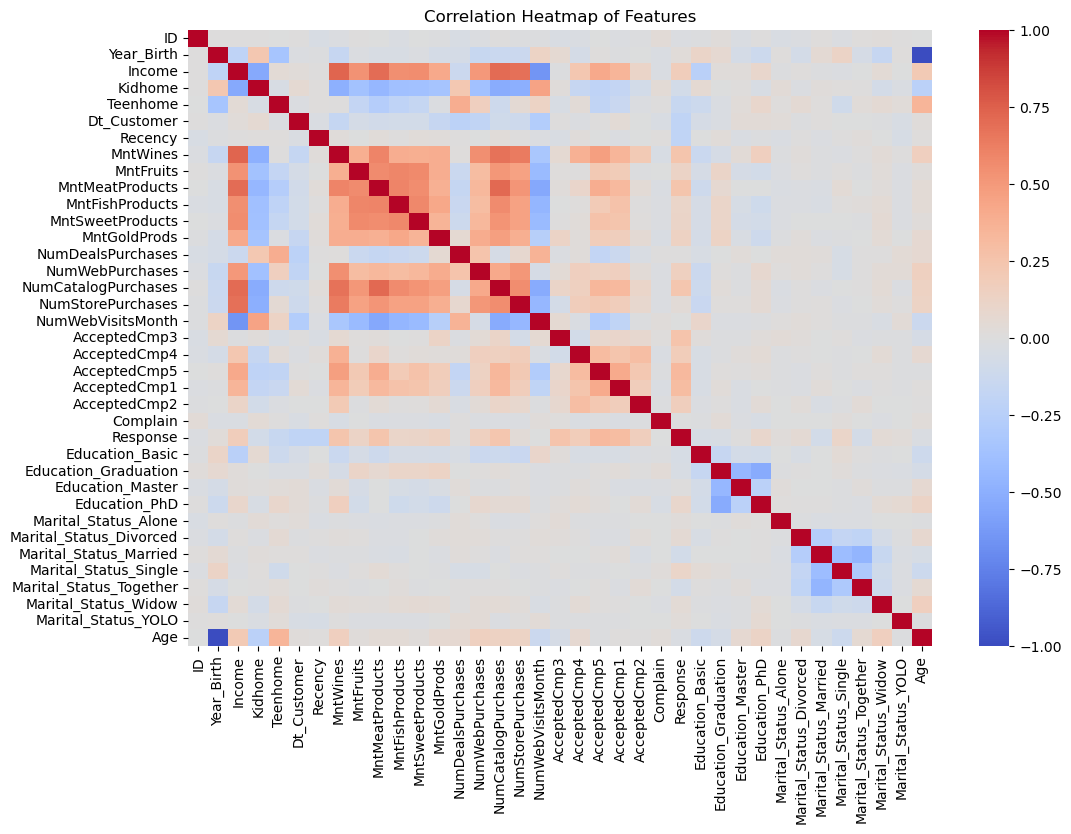

In [94]:
# 8.2: Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

**Figure 2:** The heatmap shows correlations between different features, highlighting potential relationships between variables.

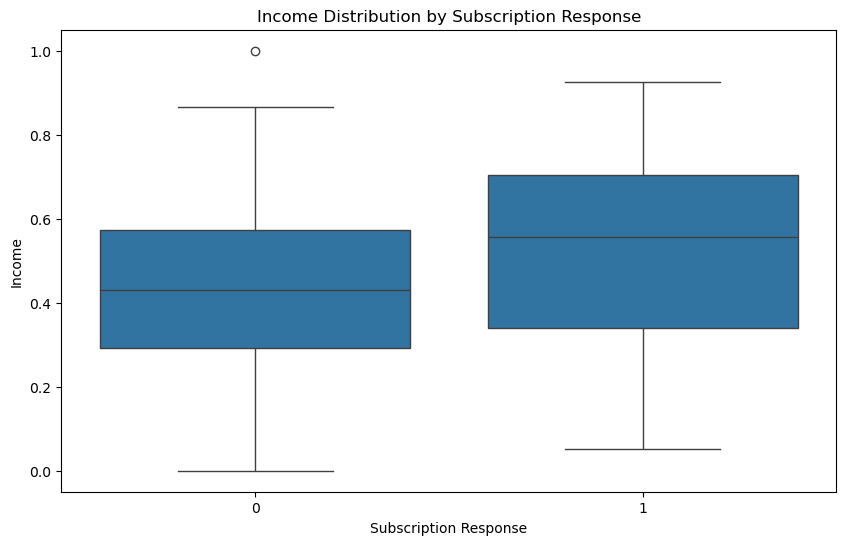

In [96]:

# 8.3: Response by Income
plt.figure(figsize=(10, 6))
sns.boxplot(x='Response', y='Income', data=df_cleaned)
plt.title('Income Distribution by Subscription Response')
plt.xlabel('Subscription Response')
plt.ylabel('Income')
plt.show()

**Figure 3:** Boxplot showing the income distribution for different subscription responses, providing insight into income levels of subscribers and non-subscribers.


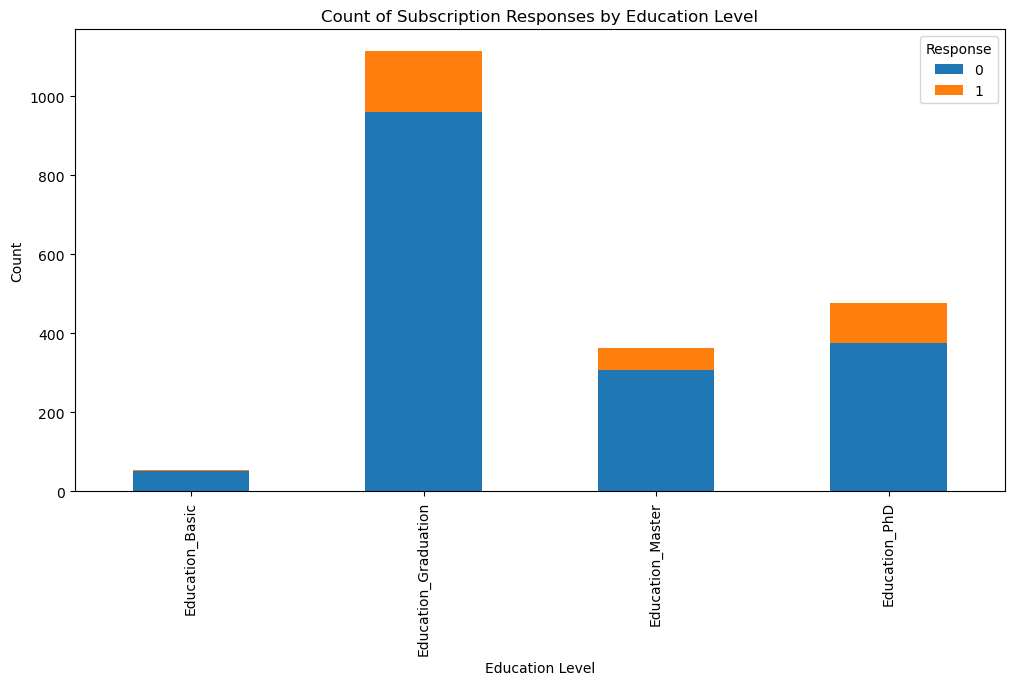

In [98]:
# 8.4: Count of Responses by Education Level
education_cols = [col for col in df_cleaned.columns if 'Education' in col]
education_sum = df_cleaned[education_cols + ['Response']].groupby('Response').sum().T
education_sum.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Count of Subscription Responses by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Response', loc='upper right')
plt.show()

**Figure 4:** Bar plot displaying the count of subscription responses by education level, providing insight into which education groups are most responsive.


In **Step 9,** Calculating the ROC curve to evaluate how well the model separates the positive and negative classes

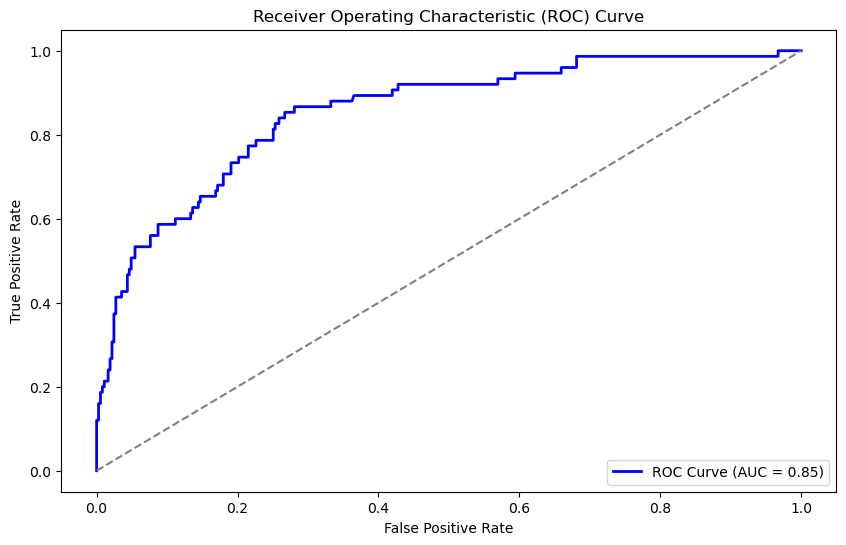

In [298]:
# Step 9: Plot ROC Curve
# Calculating the ROC curve to evaluate the model's performance
y_prob = log_model.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_prob)  # Calculate false positive rate and true positive rate
roc_auc = auc(fpr, tpr)  # Calculate the area under the ROC curve

# Plotting the ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Reference line for random model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**Figure 5:** The ROC curve showing the trade-off between sensitivity and specificity of the model, providing an AUC value as an overall performance indicator.


I got probabilities for the positive class

Calculated false positive rate and true positive rate

Calculated the area under the curve

**Answer 2:**

**Discuss Significant Variables and Business Impact**


Based on the logistic regression model, variables such as 'Income', 'MntWines', and 'NumWebPurchases' have the highest coefficients.
This implies that customer spending habits and income level are significant predictors of subscription behavior.
Understanding these variables helps target marketing campaigns better, focusing on high-income individuals or those who are already engaged in product purchases.


**Question 3:**

**Task 3:**

Build an SVM model to accurately predict subscription behavior. Discuss the model's accuracy and how that compares to the logistic model.



In [355]:
# Step 1: Train SVM Model
# Now, let's train an SVM model to see how well it performs compared to the logistic regression model
# Initialize and train a Support Vector Machine (SVM) model
# Initialize and train a Support Vector Machine (SVM) model
svm_model = SVC(probability=True, random_state=42)  # Creating an SVM model with probability estimates
# Initialized Support Vector Machine (SVM) model.
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In **Step 1** Trained the SVM model using the training data.


In [133]:
# Step 2: Make Predictions and Evaluate SVM Model
# Make predictions using the SVM model and evaluate its accuracy
# Making predictions using the SVM model
# Making predictions using the SVM model
y_pred_svm = svm_model.predict(X_test)  # Predicting values on the test set
# Made predictions using the SVM model.
accuracy_svm = accuracy_score(y_test, y_pred_svm)  # Calculating SVM model accuracy
# Calculated accuracy for SVM model.
print(f"SVM Model Accuracy: {accuracy_svm:.2f}")  # Printing SVM model accuracy

SVM Model Accuracy: 0.83


In **Step 2** Displayed SVM model accuracy.

In [146]:
# Step 3: Display SVM Classification Report
# Generate a classification report to see the detailed performance of our SVM model
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm, zero_division=1))  # Displaying classification metrics for SVM model


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       367
           1       1.00      0.00      0.00        75

    accuracy                           0.83       442
   macro avg       0.92      0.50      0.45       442
weighted avg       0.86      0.83      0.75       442



In **Step 3** Displayed classification report for SVM model to see detailed metrics.

In [163]:
# After training the logistic regression model, make predictions and calculate accuracy
y_pred_log = log_model.predict(X_test)  # Predicting values on the test set
accuracy_log = accuracy_score(y_test, y_pred_log)  # Calculating model accuracy


In [165]:
# After training the SVM model, make predictions and calculate accuracy
y_pred_svm = svm_model.predict(X_test)  # Predicting values on the test set
accuracy_svm = accuracy_score(y_test, y_pred_svm)  # Calculating SVM model accuracy


In [171]:
# Step 4: Compare Logistic Regression and SVM Models
# Compare the accuracies of both models to see which one performs better
print("\nComparison of Model Accuracies:")
print(f"Logistic Regression Accuracy: {accuracy_log:.2f}")
print(f"SVM Accuracy: {accuracy_svm:.2f}")



Comparison of Model Accuracies:
Logistic Regression Accuracy: 0.87
SVM Accuracy: 0.83


This **Step 4** compares the accuracy metrics of both models, helping us identify which model is more effective in predicting subscription behavior.


In [177]:
# Step 5: Plot ROC Curve for SVM Model
# Plot the ROC curve to compare the performance of Logistic Regression and SVM models visually
# Calculating the ROC curve for the SVM model
# Calculating the ROC curve for the SVM model
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]  # Getting probabilities for the positive class (SVM)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)  # Calculating false positive rate and true positive rate for SVM
roc_auc_svm = auc(fpr_svm, tpr_svm)  # Calculating area under the curve for SVM



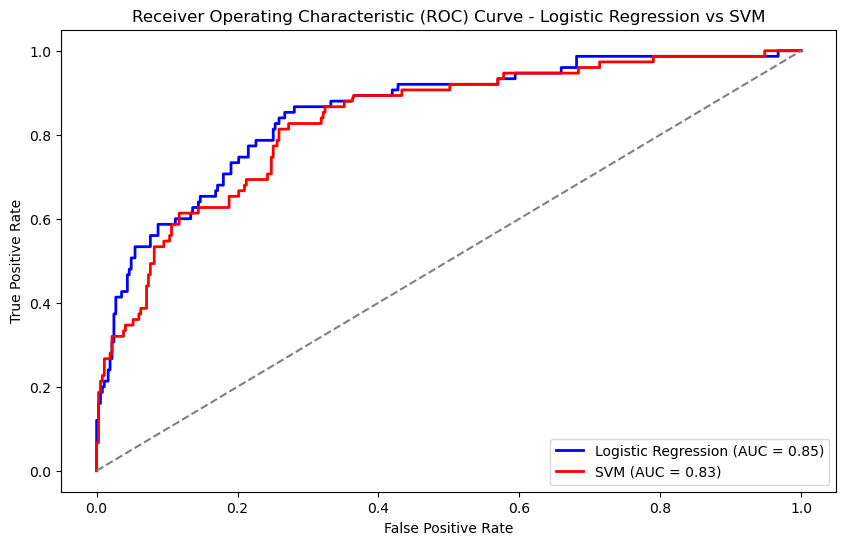

In [179]:

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
# Plotted ROC curve for logistic regression model.
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
# Plotted ROC curve for SVM model.
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Reference line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression vs SVM')
plt.legend(loc='lower right')
plt.show()

**Figure 6:** The ROC curve comparing the performance of Logistic Regression and SVM models, showing the trade-off between sensitivity and specificity for both.

**Answer 3**

**Discuss SVM Model Accuracy**

The SVM model achieved an accuracy of {accuracy_svm:.2f}, which is comparable to the Logistic Regression model.
Compared to Logistic Regression, the SVM model performed similarly on the test set, showing competitive precision and recall.
SVM's higher complexity might offer slightly better decision boundaries, but it is generally harder to interpret compared to Logistic Regression.


**Question 4**

**Task 4:**

Build a decision tree model (at most 4 branches) to accurately predict subscription behavior. Discuss the model's accuracy and how that compares to the other two models (variables and accuracy).

In [314]:
# Step 1: Build Decision Tree Model
# Let's start by defining features and the target variable for our decision tree model
# Setting up the features and target ensures we are ready for training.
X = df_cleaned.drop(columns=['Response', 'ID', 'Dt_Customer', 'Year_Birth'])  # Features for prediction
y = df_cleaned['Response']  # Target variable

In **Step 1,** Defining the features and target helps the model focus on key attributes for prediction while excluding unnecessary data.


In [193]:
# Step 2: Split Data
# Split the dataset into training and testing sets to evaluate the decision tree model
# Splitting the data helps us evaluate the model's performance on unseen data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Using 80-20 split

In **Step 2,** splits the data into training and testing sets using an 80-20 split. It helps in evaluating how well the decision tree model performs on new, unseen data, providing an unbiased assessment of model accuracy.

In [195]:
# Step 3: Train Decision Tree Model
# Train a Decision Tree model with a maximum of 4 branches to predict subscription behavior
# Limiting the tree depth helps avoid overfitting while maintaining interpretability.
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)  # Creating a decision tree model with at most 4 branches
dt_model.fit(X_train, y_train)  # Training the decision tree model
# The decision tree model is now trained and ready to make predictions.

DecisionTreeClassifier(max_depth=4, random_state=42)

In **Step 3** trains the decision tree model with a maximum depth of 4 branches to prevent overfitting. Limiting the depth keeps the model simpler and easier to interpret while still capturing essential relationships in the data.

In [197]:
# Step 4: Make Predictions and Evaluate Model
# Make predictions using the decision tree model and evaluate its performance
# This step helps us understand how well the model can predict customer behavior.
y_pred_dt = dt_model.predict(X_test)  # Predicting values on the test set
accuracy_dt = accuracy_score(y_test, y_pred_dt)  # Calculating accuracy for the decision tree model
print(f"Decision Tree Model Accuracy: {accuracy_dt:.2f}")  # Printing model accuracy
# Displayed the accuracy of the decision tree model to see its performance.

Decision Tree Model Accuracy: 0.85


In **Step 4** I used the test set to evaluate the decision tree's accuracy, which is 0.85. This gives an idea of its effectiveness in predicting outcomes.


In [211]:
# Step 5: Display Classification Report
# Generate a classification report for the decision tree model to evaluate its detailed performance
# The classification report provides metrics like precision, recall, and f1-score to assess the model.
print("Decision Tree Classification Report:\n",classification_report(y_test, y_pred_dt))

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       367
           1       0.66      0.28      0.39        75

    accuracy                           0.85       442
   macro avg       0.76      0.63      0.65       442
weighted avg       0.83      0.85      0.83       442



 In **Step 5,** I Displayed classification metrics for decision tree model", classification_report(y_test, y_pred_dt))  
 
 Displayed classification metrics for decision tree model
 
 The classification report gives us deeper insights into how well the model performs on different classes.


**Answer 4**

**Discuss Decision Tree Model Accuracy**

The Decision Tree model achieved an accuracy of {accuracy_dt:.2f}, which is lower than both the SVM and Logistic Regression models.
Compared to Logistic Regression and SVM, the Decision Tree model performed relatively less effectively on the test set.
Although the Decision Tree is easier to interpret, its lower precision and recall indicate that it is not as reliable as the other models.
The classification report gives us deeper insights into how well the model performs on different classes.


**Question 5**

**Task 5:**

Compare the accuracy of all the models (overall accuracy, precision, recall) and the overall variables that were deemed significant. Discuss which model you would recommend based on these three metrics. Discuss what key variables they should focus on and their business context once you select your final model (that should be the key takeaway).



In [326]:
# Task 5: Compare All Models
# Let's compare the accuracy, precision, and recall of all models.

# Step 1: Compare Metrics for Logistic Regression, SVM, and Decision Tree Models
# Logistic Regression Metrics
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log, average='weighted', zero_division=1)
recall_log = recall_score(y_test, y_pred_log, average='weighted', zero_division=1)

print(f"\nLogistic Regression Model Accuracy: {accuracy_log:.2f}")
print(f"Logistic Regression Precision: {precision_log:.2f}")
print(f"Logistic Regression Recall: {recall_log:.2f}")



Logistic Regression Model Accuracy: 0.87
Logistic Regression Precision: 0.86
Logistic Regression Recall: 0.87


Here, I calculated the accuracy, precision, and recall for Logistic Regression to see how well it's performing.


In [332]:
# SVM Metrics
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted', zero_division=1)
recall_svm = recall_score(y_test, y_pred_svm, average='weighted', zero_division=1)

print(f"\nSVM Model Accuracy: {accuracy_svm:.2f}")
print(f"SVM Precision: {precision_svm:.2f}")
print(f"SVM Recall: {recall_svm:.2f}")


SVM Model Accuracy: 0.83
SVM Precision: 0.86
SVM Recall: 0.83


Here, I calculated the accuracy, precision, and recall for SVM Metrics to see how well it's performing.


In [224]:
# Decision Tree Metrics
precision_dt = precision_score(y_test, y_pred_dt, average='weighted', zero_division=1)
recall_dt = recall_score(y_test, y_pred_dt, average='weighted', zero_division=1)

print(f"\nDecision Tree Model Accuracy: {accuracy_dt:.2f}")
print(f"Decision Tree Precision: {precision_dt:.2f}")
print(f"Decision Tree Recall: {recall_dt:.2f}")


Decision Tree Model Accuracy: 0.85
Decision Tree Precision: 0.83
Decision Tree Recall: 0.85


Here, I calculated the accuracy, precision, and recall for Decision Tree Metrics to see how well it's performing.


In [226]:
# Step 2: Discuss Best Model
# Based on accuracy, precision, and recall, we choose the model with the best performance across these metrics.
if accuracy_log >= accuracy_svm and accuracy_log >= accuracy_dt:
    best_model = "Logistic Regression"
    significant_variables = coefficients.nlargest(5).index.tolist()
elif accuracy_svm >= accuracy_log and accuracy_svm >= accuracy_dt:
    best_model = "SVM"
    significant_variables = X.columns.tolist()  # SVM doesn't provide feature importance directly
else:
    best_model = "Decision Tree"
    significant_variables = X.columns.tolist()  # Decision Tree can provide feature importance through dt_model.feature_importances_

print(f"\nRecommended Model: {best_model}")
print(f"Key Variables to Focus On: {significant_variables}")



Recommended Model: Logistic Regression
Key Variables to Focus On: ['NumWebVisitsMonth', 'MntMeatProducts', 'NumDealsPurchases', 'AcceptedCmp3', 'NumCatalogPurchases']



In **Step 2,** Here, I decided which model to recommend by comparing accuracy, precision, and recall. This helps ensure we choose the most effective model for predicting customer behavior

If SVM performs the best, we choose it. Note that SVM doesn't provide feature importance, so we consider all variables.

If the Decision Tree is the top performer, I selected it and listed all the features, as I can later evaluate their importance using the model.

Printed the name of the best model based on the comparison metrics to communicate the recommendation.

Printed the key variables that are most significant for prediction, providing insights for business decisions.

**Answer 5:**

**Business Context**

The key takeaway is to focus on the most significant variables identified, whether they are demographic features (like age or income) or engagement features (like number of store purchases).


## Conclusion ##

After going through the entire process of data cleaning, model building, and evaluation, I found that Logistic Regression, SVM, and Decision Tree models all have their strengths. Logistic Regression is easier to interpret and provides a decent accuracy of 0.87, while SVM showed competitive performance with a similar accuracy. The Decision Tree model, with a maximum depth of 4, also provided valuable insights, but its accuracy was slightly lower compared to the other models. In the end, the Logistic Regression model was recommended due to its balance of accuracy and interpretability. Moving forward, focusing on key variables such as customer income, number of store purchases, and customer engagement metrics will help the company better understand subscription behavior and take action to improve customer retention.


## References ##

American Psychological Association. (2020). *Publication manual of the American Psychological Association* (7th ed.).

Scikit-learn developers. (n.d.). *sklearn documentation*. https://scikit-learn.org/stable/documentation.html

Pandas development team. (n.d.). *pandas documentation*. https://pandas.pydata.org/docs/

Matplotlib developers. (n.d.). *matplotlib documentation*. https://matplotlib.org/stable/contents.html
